# Face Recognition 

## Task 1: Face Acquisition (4.2)
This task focuses on capturing images of the user's face for registration.

### Step 1: Create Storage Folder
We will create a folder named `face_img` in the working directory to store the face images.

### Step 2: Open Camera and Snap Face
- The camera will be opened using OpenCV.
- You will be prompted to enter your ID number (e.g., student ID).
- Press the 's' key to capture grayscale images of your face.
- Capture more than 100 images with different angles and expressions.
- Images will be saved in the `./face_img` folder as `user_<ID>_<num>.jpg`.

In [2]:
import cv2
import os

# Create storage folder for face images
face_img_dir = 'face_img'
os.makedirs(face_img_dir, exist_ok=True)
print(f"Storage folder '{face_img_dir}' is ready.")

Storage folder 'face_img' is ready.


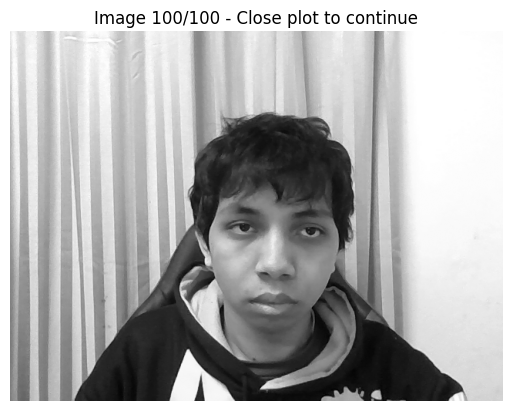

Saved: user_228801143_100.jpg


In [ ]:
# Open camera and capture face images in Jupyter using matplotlib
import cv2
import os
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    cap.release()
    raise SystemExit()

user_id = input("Enter user ID (e.g., student ID): ")

count = 0
max_images = 100

print("Press the stop button in the notebook to end capture loop.")
try:
    while count < max_images:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Display the frame in the notebook
        plt.axis('off')
        plt.imshow(gray, cmap='gray')
        plt.title(f'Image {count+1}/{max_images} - Close plot to continue')
        plt.show()
        # Ask user if they want to save this frame
        save = input("Save this image? (y/n, or 'q' to quit): ")
        if save.lower() == 'y':
            count += 1
            img_name = f"user_{user_id}_{count}.jpg"
            cv2.imwrite(os.path.join(face_img_dir, img_name), gray)
            print(f"Saved: {img_name}")
        elif save.lower() == 'q':
            print("Exiting without completing image capture.")
            break
        clear_output(wait=True)
finally:
    cap.release()
    # cv2.destroyAllWindows()


    

## Task 2: Face Detection (4.3)
This task detects the face region of interest (ROI) from the collected images using the Haar cascade classifier.

- Make sure you have the `haarcascade_frontalface_default.xml` file in your working directory.
- Detected faces will be saved in a new `small_face` folder, organized by user ID.

In [8]:
import cv2
import os

# Load Haar cascade classifier
face_clf = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Define paths
large_face_dir = 'face_img'
small_face_dir = 'small_face'
os.makedirs(small_face_dir, exist_ok=True)

# Traverse each user's images in face_img
for img_name in os.listdir(large_face_dir):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue
    img_path = os.path.join(large_face_dir, img_name)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to read {img_path}")
        continue
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_clf.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for i, (x, y, w, h) in enumerate(faces):
        face_roi = img[y:y+h, x:x+w]
        face_resized = cv2.resize(face_roi, (160, 160))
        # Extract user id from filename (assumes format user_<id>_<num>.jpg)
        try:
            user_id = img_name.split('_')[1]
        except IndexError:
            user_id = 'unknown'
        user_folder = os.path.join(small_face_dir, user_id)
        os.makedirs(user_folder, exist_ok=True)
        save_path = os.path.join(user_folder, f"{os.path.splitext(img_name)[0]}_face{i+1}.jpg")
        cv2.imwrite(save_path, face_resized)
        print(f"Saved: {save_path}")

Saved: small_face\228801143\user_228801143_1_face1.jpg
Saved: small_face\228801143\user_228801143_10_face1.jpg
Saved: small_face\228801143\user_228801143_100_face1.jpg
Saved: small_face\228801143\user_228801143_11_face1.jpg
Saved: small_face\228801143\user_228801143_12_face1.jpg
Saved: small_face\228801143\user_228801143_2_face1.jpg
Saved: small_face\228801143\user_228801143_20_face1.jpg
Saved: small_face\228801143\user_228801143_21_face1.jpg
Saved: small_face\228801143\user_228801143_22_face1.jpg
Saved: small_face\228801143\user_228801143_23_face1.jpg
Saved: small_face\228801143\user_228801143_24_face1.jpg
Saved: small_face\228801143\user_228801143_25_face1.jpg
Saved: small_face\228801143\user_228801143_26_face1.jpg
Saved: small_face\228801143\user_228801143_27_face1.jpg
Saved: small_face\228801143\user_228801143_28_face1.jpg
Saved: small_face\228801143\user_228801143_29_face1.jpg
Saved: small_face\228801143\user_228801143_3_face1.jpg
Saved: small_face\228801143\user_228801143_39_face

## Task 3: Data Preprocessing (4.4)
This task prepares the detected face images for neural network training.

- Reads all small face images and their labels.
- Encodes labels and splits data into training and test sets.
- Uses `LabelEncoder` and `keras.utils.to_categorical` for encoding.

In [9]:
import os
import cv2
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Step 1: Read image data and labels
X = []
Y = []
small_face_dir = 'small_face'

for user_id in os.listdir(small_face_dir):
    user_folder = os.path.join(small_face_dir, user_id)
    if not os.path.isdir(user_folder):
        continue
    for img_name in os.listdir(user_folder):
        img_path = os.path.join(user_folder, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img)
        Y.append(user_id)

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Step 2: Label encoding and split data
label_encoder = preprocessing.LabelEncoder()
Y_num = label_encoder.fit_transform(Y)
Y_cat = to_categorical(Y_num)

# Split data: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42, stratify=Y_num)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")

Total samples: 84
Training samples: 67
Test samples: 17


## Task 4: Build the Model (4.5)
This task constructs the Convolutional Neural Network (CNN) for facial recognition.

- Imports TensorFlow/Keras modules.
- Defines a function to build the CNN model as specified.
- Compiles the model with appropriate settings.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

def CNN_classification_model(input_shape, output_size, dropout_rate=0.5):
    model = Sequential()
    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    # Third Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(dropout_rate))
    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_size, activation='softmax'))
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Example usage:
input_shape = x_train.shape[1:]  # (160, 160, 3)
output_size = y_train.shape[1]   # number of classes
model = CNN_classification_model(input_shape, output_size)
model.summary()

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,674,177 (40.72 MB)

 Trainable params: 10,674,177 (40.72 MB)

 Non-trainable params: 0 (0.00 B)

## Task 5: Train and Evaluate Model (4.6)
This task trains, evaluates, and saves the CNN model for face recognition.

- Initializes parameters and model.
- Trains and evaluates the model.
- Saves the complete model and weights.

In [12]:
# Task 5: Train, Evaluate, and Save the Model
input_shape = (160, 160, 3)  # Use 3 channels if images are RGB, else (160, 160, 1) for grayscale
drop_rate = 0.5
output_size = y_train.shape[1]  # Number of registered users/classes

# Instantiate the model
model = CNN_classification_model(input_shape, output_size, dropout_rate=drop_rate)
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

# Save the complete model
model.save('./final_faceReco.h5')
print("Saved complete model to './final_faceReco.h5'")

# Save only the weights (filename must end with .weights.h5)
model.save_weights('./faceReco.weights.h5')
print("Saved model weights to './faceReco.weights.h5'")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 36, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    10,617,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,674,177 (40.72 MB)

 Trainable params: 10,674,177 (40.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 

Test accuracy: 1.0000, Test loss: 0.0000
Saved complete model to './final_faceReco.h5'
Saved model weights to './faceReco.weights.h5'
Saved complete model to './final_faceReco.h5'
Saved model weights to './faceReco.weights.h5'


## Task 6: Dynamic Face Recognition (4.7)
This task implements real-time face detection, recognition, and visualization for a canteen payment system.

- Maps recognition results to user info.
- Displays Chinese text on frames.
- Performs real-time face recognition and overlays user info.

In [20]:
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Step 1: User info mapping function
def user_Info_get(y_pre, Y_dic):
    idx = np.argmax(y_pre)
    user_id = Y_dic['id'][idx]
    balance = Y_dic['balance'][idx]
    consumption = Y_dic['consumption'][idx]
    return user_id, balance, consumption

# Example user info dictionary (replace with your real data)
Y_dic = {
    'id': ['o1143', '1002'],
    'balance': ['￥100', '￥80'],
    'consumption': ['￥20', '￥40']
}

# Step 2: Chinese text drawing function
def draw_chinese(img, text, pos, color=(0,255,0), font_size=24):
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(img_pil)
    try:
        font = ImageFont.truetype("simhei.ttf", font_size)  # Ensure simhei.ttf is available
    except IOError:
        font = ImageFont.load_default()
    draw.text(pos, text, font=font, fill=color)
    return cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)

# Step 3: Real-time face recognition and visualization (Jupyter-friendly)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
new_model = load_model('./final_faceReco.h5')

cap = cv2.VideoCapture(0)
print("Interrupt the cell or close the plot to stop.")
try:
    frame_count = 0
    display_interval = 3  # Show every 3rd frame to reduce flicker
    while True:
        ret, img = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        for (x, y, w, h) in faces:
            # Only process the first detected face
            face_roi = img[y:y+h, x:x+w]
            face_resized = cv2.resize(face_roi, (160, 160))
            face_input = np.expand_dims(face_resized, axis=0) / 255.0
            y_pre = new_model.predict(face_input)
            user_id, balance, consumption = user_Info_get(y_pre, Y_dic)
            # Draw rectangle and info
            cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
            info_text = f"工号/学号: {user_id}  余额: {balance}  消费: {consumption}"
            img = draw_chinese(img, info_text, (x, y-30), color=(255,0,0), font_size=24)
            break  # Only process one face per frame
        frame_count += 1
        if frame_count % display_interval == 0:
            plt.axis('off')
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show()
            clear_output(wait=True)
except KeyboardInterrupt:
    print('Stopped by user.')
finally:
    cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Stopped by user.
Stopped by user.
